<a href="https://colab.research.google.com/github/SoumyadeepDebnath/Data-Engineering/blob/main/AzureDatabricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#display the dataframe in normal tabular view, we can get the different views like tablular or charts (pie,Area,Bar,etc.), and download options from Databricks.
df.display() / display(df)

#### **DBFS**

In [ ]:
%fs ls

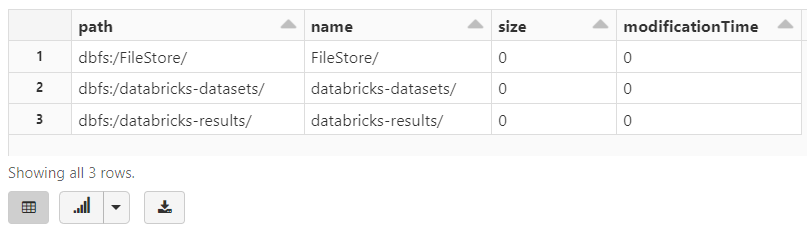

In [ ]:
%fs mkdir mydir
# -> dbfs:/mydir/

#### **Upload Data without Mount**

In [ ]:
#File path - dbfs:/FileStore/shared_uploads/<username>/

#### **Mount**

In [ ]:
#File path - dbfs:/mnt/<mount-name>/...../

In [ ]:
dbutils.fs.help()

In [ ]:
#Mount Azure Blob storage containers to DBFS
dbutils.fs.mount(
  source = "wasbs://<container-name>@<storage-account-name>.blob.core.windows.net",
  mount_point = "/mnt/<mount-name>",
  extra_configs = {"<conf-key>":dbutils.secrets.get(scope = "<scope-name>", key = "<key-name>")})

In [ ]:
dbutils.fs.refreshMounts()

In [ ]:
dbutils.fs.unmount("/mnt/<mount-name>")

In [ ]:
#Show list of mounts :

%fs mounts

dbutils.fs.ls("<mount-path>")
%fs ls <mount-path>

https://docs.microsoft.com/en-us/azure/databricks/_static/notebooks/delta/quickstart-python.html

In [ ]:
#clean ip
dbutils.fs.rm(path, True)



### **Execute a DataBricks Notebook From Another Notebook**

This command accepts three parameters:
1.   path: relative path to the executed notebook
2.   timeout (in seconds): kill the notebook in case the execution time exceeds the given timeout
3.   arguments: a dictionary of arguments that is passed to the executed notebook, must be implemented as widgets in the executed notebook





In [ ]:
dbutils.notebook.run("notebook-name_with_path", 60, {"argument": "data", "argument2": "data2", ...})
dbutils.notebook.exit("notebook-name_with_path")

In [ ]:
# Example 1 - returning data through temporary views.
# You can only return one string using dbutils.notebook.exit(), but since called notebooks reside in the same JVM, you can
# return a name referencing data stored in a temporary view.

## In callee notebook
spark.range(5).toDF("value").createOrReplaceGlobalTempView("my_data")
dbutils.notebook.exit("my_data")

## In caller notebook
returned_table = dbutils.notebook.run("LOCATION_OF_CALLEE_NOTEBOOK", 60)
global_temp_db = spark.conf.get("spark.sql.globalTempDatabase")
display(table(global_temp_db + "." + returned_table))

# Example 2 - returning data through DBFS.
# For larger datasets, you can write the results to DBFS and then return the DBFS path of the stored data.

## In callee notebook
dbutils.fs.rm("/tmp/results/my_data", recurse=True)
spark.range(5).toDF("value").write.format("parquet").load("dbfs:/tmp/results/my_data")
dbutils.notebook.exit("dbfs:/tmp/results/my_data")

## In caller notebook
returned_table = dbutils.notebook.run("LOCATION_OF_CALLEE_NOTEBOOK", 60)
display(spark.read.format("parquet").load(returned_table))

# Example 3 - returning JSON data.
# To return multiple values, you can use standard JSON libraries to serialize and deserialize results.

## In callee notebook
import json
dbutils.notebook.exit(json.dumps({
  "status": "OK",
  "table": "my_data"
}))

## In caller notebook
result = dbutils.notebook.run("LOCATION_OF_CALLEE_NOTEBOOK", 60)
print(json.loads(result))

### **Check the version of Azure Databricks Runtime**

In [ ]:
spark.conf.get("spark.databricks.clusterUsageTags.sparkVersion")

### **Checking the version of Azure Databricks Runtime**